# ME460 Linkages - Prof. Mark Ganter

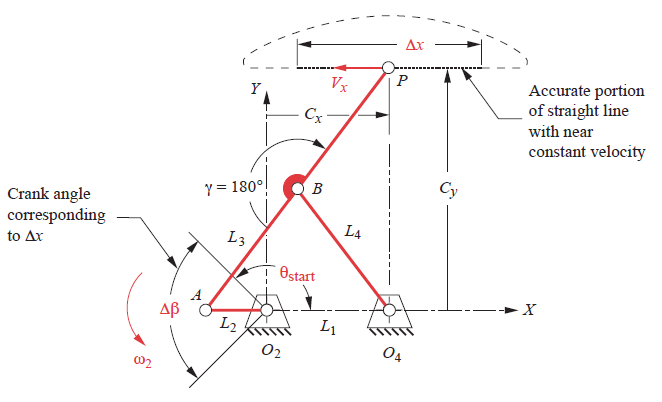

# example linkage problem using python (Hoekens straight-line linkage)

## now lets compute multiple position solutions and plot the couple point
## by iterating the input angle 0->360 degrees by a set number of degrees (eg. 5)

In [15]:
# simple example of using Zelle's graphics.py graphics library.
from graphics import *
win = GraphWin("My Circle", 400,400)
c = Circle(Point(200,200), 100)
c.draw(win)
win.getMouse() # pause for click in window
win.close()

In [16]:
#%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *
import numpy as np

from graphics import *
import matplotlib.pyplot as plt



#set up all the variables and vectors
#this time t2 needs to symbolic too
t2, t3, t4 = symbols("t2 t3 t4", real=True)
r1 = 4*exp(I*0)
r2 = 2*exp(I*t2)
r3 = 5*exp(I*t3)
r4 = 5*exp(I*t4)
r5 = 10*exp(I*t3)

#graphics screen window and screen coordinates
win = GraphWin("Linkages",640,640)
win.setCoords(-5,-5,15,15)

#create graphics points for the ground pivots
goA = Point(0,0)
goB = Point(re(r1),im(r1))
#write out the equation for linkage (looks just like what we put on the board)
eq = r2+r3-r4-r1
plotpt = r2+r5
print("eq=",eq)
print("plotpt=",plotpt)


# loop through input angle from 0 -> 360 by 5 degrees (can't go finer than 1 degree or you must change arrays)
for i in range(0,360,2):
    
    # compute loop eq with t2 substituted 
    eq2 = eq.subs(t2,radians(i))
    #print("eq2=",eq2)
    ans = nsolve((re(eq2),im(eq2)), (t3, t4), (1,1.75), tol=1.e-3)
    
    #substitute solutions into r-vectors to get numerical values
    vect2 = r2.subs(t2,radians(i))
    vect3 = r3.subs(t3,ans[0])
    vect5 = r5.subs(t3,ans[0])  
    
    #create graphics points for mechanism points A, B & C.
    gptA = Point(re(vect2),im(vect2))
    gptB = Point(re(vect2+vect3),im(vect2+vect3))
    gptC = Point(re(vect2+vect5),im(vect2+vect5))
    
    #Levi Inserted window clear
    for item in win.items[:]:
        item.undraw()
    win.update()

    #create graphic lines and draw them.
    # line = Line(goA,gptA)
    # line.draw(win)
    Line(goA,gptA).draw(win).setOutline('red')
    Line(gptA,gptB).draw(win)
    Line(gptB,goB).draw(win)
    Line(goB,goA).draw(win)
    Line(gptA,gptC).draw(win)

#graphics 
win.getMouse() #this waits until user clicks mouse
win.close()

eq= 2*exp(I*t2) + 5*exp(I*t3) - 5*exp(I*t4) - 4
plotpt= 2*exp(I*t2) + 10*exp(I*t3)


GraphicsError: getMouse in closed window